# import

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('/media/zero/dropbox/Dropbox/Data science project'))
if module_path not in sys.path: sys.path.append(module_path)

In [2]:
import fastai
from fastai.imports import *
from fastai.structured import *

/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
import taproc
from taproc.eda import *
from taproc.utils import *
from taproc.feature import *

In [4]:
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import plotnine
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import gc

In [6]:
from os import path

# read file, need to re construct

## func

In [7]:
def file_process(file_name = None, column_name = None, df_proc = None, limit = None):
    if file_name is not None:
        df = pd.read_csv(str(file_name) + '.csv', low_memory= False)
        if limit is not None:
            df = df[:limit]
        gc.collect()
        train_cats(df) #convert to category
        df_proc, num_cols = proc_df2(df, y_fld = None, max_n_cat= 10) #processing df
    
    return df, df_proc, num_cols

In [8]:
def proc_df2(df, y_fld = None, skip_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    if not skip_flds: skip_flds=[]
    if subset: df = get_sample(df,subset)
    df = df.copy()
    if preproc_fn: preproc_fn(df)
    
    y = y_fld
    if y_fld is not None:
        y = df[y_fld].values
        df.drop(skip_flds+[y_fld], axis=1, inplace=True)

    if na_dict is None: na_dict = {}
    for n,c in df.items(): na_dict = fix_missing(df, c, n, na_dict)
    if do_scale: mapper = scale_vars(df, mapper)
    for n,c in df.items(): numericalize(df, c, n, max_n_cat)
        
    num_cols = df._get_numeric_data().columns
    sk_id_notin = ['SK_ID_BUREAU', 'SK_ID_CURR', 'SK_ID_PREV'] 
    num_cols = list([i for i in num_cols if i not in sk_id_notin and not i.endswith('na')])
    
    res = [pd.get_dummies(df, dummy_na=True), num_cols]
    if do_scale: res = res + [mapper]
    return res

In [9]:
file_path = Path('/media/zero/dropbox/Dropbox/Data science project/kaggle/home_credit_default_risk/data')

## app train

In [10]:
app_train, app_train_proc, _ = file_process(file_name = file_path/'application_train')
app_train_y = app_train['TARGET']

In [11]:
#app_train_proc.drop(columns= ['TARGET'], axis = 1, inplace=True)

In [12]:
app_train = app_train.drop(columns= ['TARGET'], axis = 1)

In [13]:
app_test, app_test_proc, _ = file_process(file_name = file_path/'application_test')

## bureau

In [105]:
_, bureau_proc, _ = file_process(file_name = file_path/'bureau')

In [106]:
bureau_proc.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_ACTIVE_nan,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_CURRENCY_nan
0,215354,5714462,-497,0,-153.0,-153.0,0.0,0,91323.0,0.0,...,0,0,1,0,0,1,0,0,0,0
1,215354,5714463,-208,0,1075.0,-897.0,0.0,0,225000.0,171342.0,...,1,0,0,0,0,1,0,0,0,0
2,215354,5714464,-203,0,528.0,-897.0,0.0,0,464323.5,0.0,...,1,0,0,0,0,1,0,0,0,0
3,215354,5714465,-203,0,-330.0,-897.0,0.0,0,90000.0,0.0,...,1,0,0,0,0,1,0,0,0,0
4,215354,5714466,-629,0,1197.0,-897.0,77674.5,0,2700000.0,0.0,...,1,0,0,0,0,1,0,0,0,0


# EDA

## distibution of target

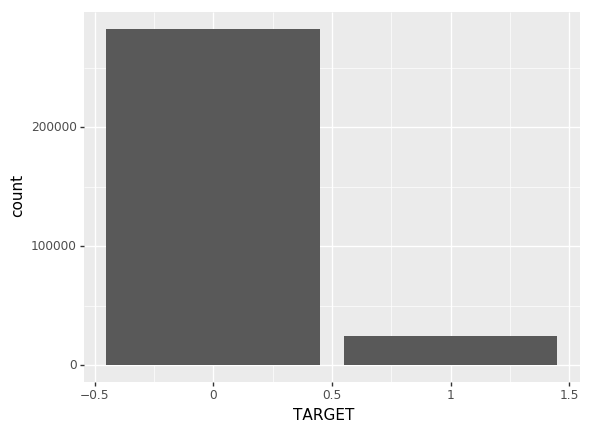

<ggplot: (8741109936704)>

In [47]:
(ggplot(app_train)
    + aes('TARGET')
    + geom_bar())

## missing data

In [15]:
mss = missing.from_df(app_train)

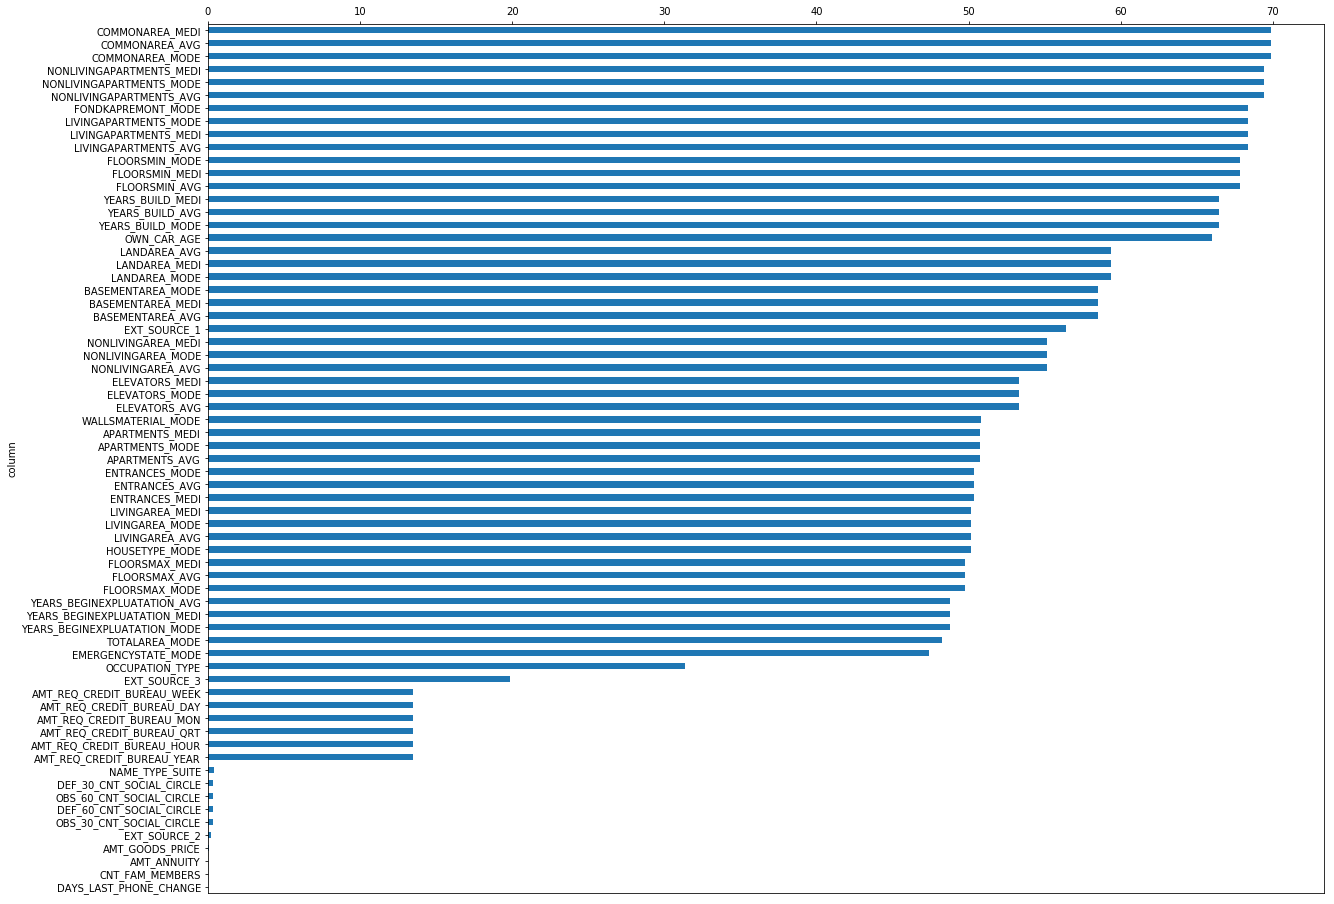

In [16]:
mss.plot()

In [17]:
mss.top(5)

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE']

In [18]:
mss[:5]

,column,missing_percent
41,COMMONAREA_MEDI,69.872297
13,COMMONAREA_AVG,69.872297
27,COMMONAREA_MODE,69.872297
49,NONLIVINGAPARTMENTS_MEDI,69.432963
35,NONLIVINGAPARTMENTS_MODE,69.432963


## correlation

In [77]:
corr = correlation.from_df(app_train, 'TARGET')

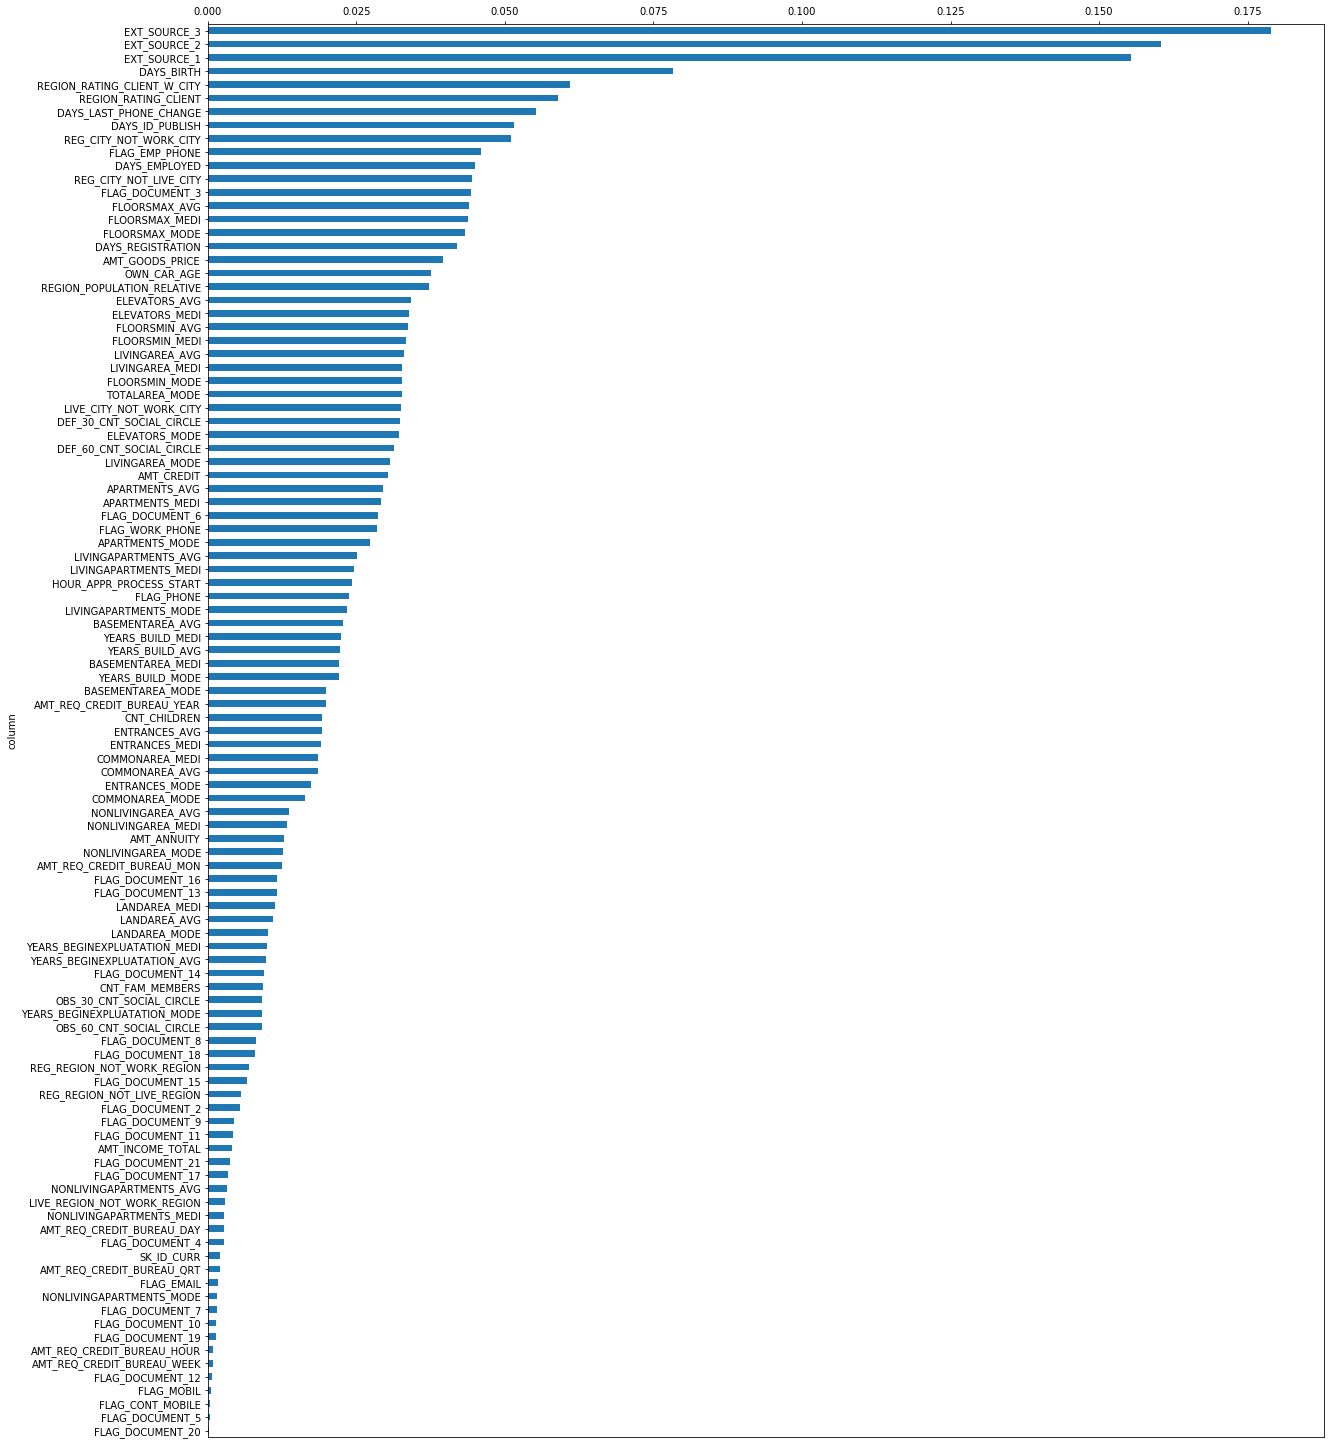

In [20]:
corr.plot()

In [21]:
corr.top(5)

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'DAYS_BIRTH',
 'REGION_RATING_CLIENT_W_CITY']

In [78]:
corr[:30]

,column,corr,neg
31,EXT_SOURCE_3,0.178919,True
30,EXT_SOURCE_2,0.160472,True
29,EXT_SOURCE_1,0.155317,True
8,DAYS_BIRTH,0.078239,False
21,REGION_RATING_CLIENT_W_CITY,0.060893,False
20,REGION_RATING_CLIENT,0.058899,False
79,DAYS_LAST_PHONE_CHANGE,0.055218,False
11,DAYS_ID_PUBLISH,0.051457,False
27,REG_CITY_NOT_WORK_CITY,0.050994,False
14,FLAG_EMP_PHONE,0.045982,False


## histogram

In [22]:
hist = histogram.from_df(app_train, 'DAYS_BIRTH')

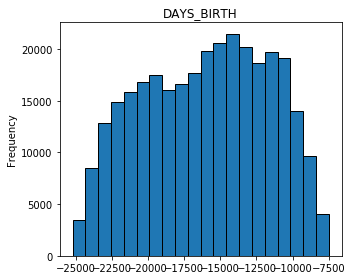

In [23]:
hist.plot()

## kde plot

In [14]:
kde = KernelDensityEstimation.from_df(app_train, 'TARGET', ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'])

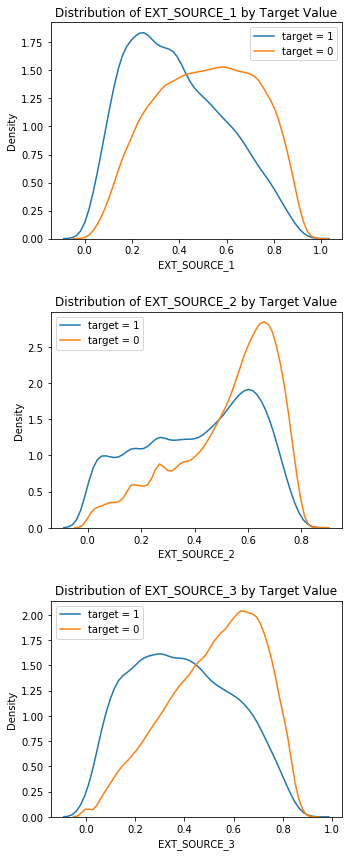

In [15]:
kde.plot()

In [ ]:
### the younger is more likely to not pay the loan on time

# feature enginerring

after create new feature, lets check by correlation with target variable

https://www.kaggle.com/jsaguiar/updated-0-792-lb-lightgbm-with-simple-features/code
The following key ideas were used:
- Divide or subtract important features to get rates (like annuity and income)
- In Bureau Data: create specific features for Active credits and Closed credits
- In Previous Applications: create specific features for Approved and Refused applications
- Modularity: one function for each table (except bureau_balance and application_test)
- One-hot encoding for categorical features
All tables are joined with the application DF using the SK_ID_CURR key (except bureau_balance).

filter then agrreate

## function

In [ ]:
### customize aggreate function

In [133]:
#we arrow down the columns that make sense
x_train = x_train[ipt_ft]

In [ ]:
list(params.keys())+to_list(by_col)

In [173]:
def aggreate(df, params, by_col, prefix = 'AGG'):
    '''mean, median, prod, sum, std, var, max, min, count, nunique'''
    df_agg = df.groupby(by_col).agg(params)
    df_agg.columns = ['_'.join([prefix.upper(), c[0], c[1].upper()]) for c in df_agg.columns.tolist()]
    return df_agg.reset_index()

In [67]:
def suma(x): return np.sum(x)

## create new varible by different btw two variable with division or minus

In [155]:
x_train['DAYS_EMPLOYED_PERC'] = x_train['DAYS_EMPLOYED']/x_train['DAYS_BIRTH']
x_train['INCOME_CREDIT_PERC'] = x_train['AMT_INCOME_TOTAL']/x_train['AMT_CREDIT']
x_train['INCOME_PER_PERSON'] = x_train['AMT_INCOME_TOTAL']/x_train['CNT_FAM_MEMBERS']

In [ ]:
#credit per person??

## Basic agrreate function

we can use a define function like: def suma(x): return np.sum(x)
or use quick lambda function: lambda x: np.sum(x)

In [134]:
agg_params = {'AMT_CREDIT_MAX_OVERDUE' : ['sum', 'min'], 
              'AMT_CREDIT_SUM' : ['min', 'max'],
             'CREDIT_DAY_OVERDUE': ['min', 'max']}

In [135]:
br_agg = aggreate(bureau_proc, agg_params, 'SK_ID_CURR')

In [137]:
#join back
x_train = x_train.merge(br_agg, how='left', on='SK_ID_CURR')

In [140]:
x_train.columns

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'SK_ID_CURR', 'AMT_ANNUITY', 'DAYS_EMPLOYED',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_1',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'TOTALAREA_MODE', 'LIVINGAREA_MODE', 'CNT_CHILDREN', 'LIVINGAREA_MEDI',
       'LIVINGAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'AGG_AMT_CREDIT_MAX_OVERDUE_SUM', 'AGG_AMT_CREDIT_MAX_OVERDUE_MIN',
       'AGG_AMT_CREDIT_SUM_MIN', 'AGG_AMT_CREDIT_SUM_MAX',
       'AGG_CREDIT_DAY_OVERDUE_MIN', 'AGG_CREDIT_DAY_OVERDUE_MAX'],
      dtype='object')

df after merge have so much null values. Do we need fill by value or leave model treat it?

In [ ]:
##or do it by this way???
group_object = groupby_SK_ID_CURR['AMT_CREDIT_SUM_DEBT'].agg('sum').reset_index()
group_object.rename(index=str, columns={'AMT_CREDIT_SUM_DEBT': 'bureau_total_customer_debt'},inplace=True)

## filter by values of columns then aggreate

CREDIT_ACTIVE_Active

In [142]:
active = bureau_proc[bureau_proc['CREDIT_ACTIVE_Active'] == 1]
active_agg = aggreate(active, agg_params, 'SK_ID_CURR', 'ACTIVE')
x_train = x_train.merge(active_agg, how='left', on='SK_ID_CURR')
del active, active_agg
gc.collect()

In [150]:
close = bureau_proc[bureau_proc['CREDIT_ACTIVE_Closed'] == 1]
close_agg = aggreate(close, agg_params, 'SK_ID_CURR', 'CLOSED')
x_train = x_train.merge(close_agg, how='left', on='SK_ID_CURR')
del close, close_agg
gc.collect()

465

## create variable base on time

In [63]:
app_train_proc['long_employment'] = (app_train_proc['DAYS_EMPLOYED'] < -2000).astype(int)

In [ ]:
get first or last

In [ ]:
for example. cut of 3 months near,

In [ ]:
eval('np.{}'.format(function_name))(X[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], axis=1)

## merge

In [ ]:
bureau_proc.groupby('SK_ID_CURR', as_index=False).count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})

In [23]:
previous_loan_count = bureau_proc.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})

In [26]:
app_train_proc.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,1,0,0,1,0,0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0,0,0,1,0,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0,0,1,0,0,1
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0,0,1,0,0,1
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0,0,1,0,0,1


In [32]:
app_train_proc = app_train_proc.merge(previous_loan_count, on = 'SK_ID_CURR', how = 'left')

In [33]:
app_train_proc.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,previous_loan_counts
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,1,0,0,1,0,0,8.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,0,1,0,0,4.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,1,0,0,1,2.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,1,0,0,1,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,1,0,0,1,1.0


In [34]:
kde_new = KernelDensityEstimation.from_df(app_train_proc, 'TARGET', 'previous_loan_counts')

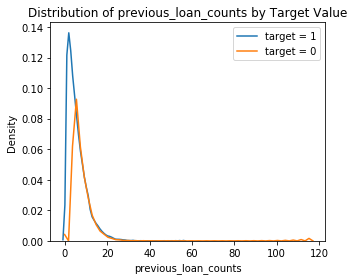

In [35]:
kde_new.plot()

# dendrogram

In [68]:
ddg = dendrogram(app_train_keep)

In [69]:
ddg.result

,col1,col2,dist
0,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.0027
1,AMT_CREDIT,AMT_GOODS_PRICE,0.0156
2,DAYS_EMPLOYED,ORGANIZATION_TYPE,0.5642
3,DAYS_BIRTH,OCCUPATION_TYPE,0.6535
4,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,0.8150
5,EXT_SOURCE_3,EXT_SOURCE_1,0.9071


In [70]:
ddg.chk_ft(2)

['OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE']

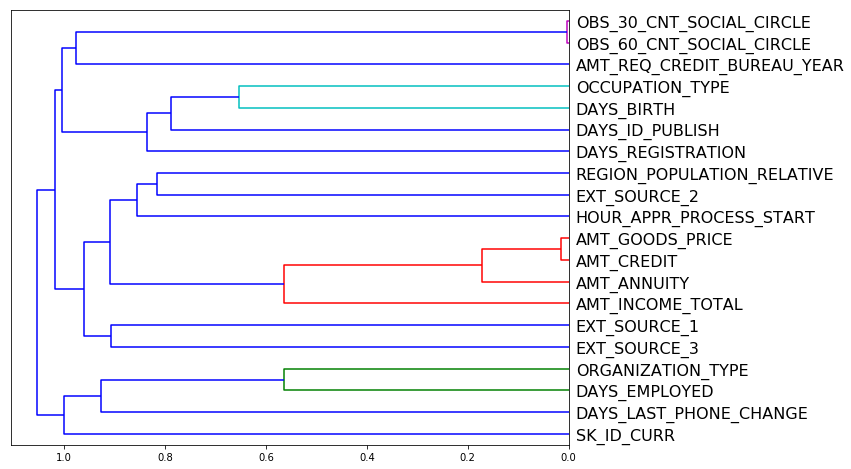

In [71]:
ddg.plot()

# split validation set

http://www.fast.ai/2017/11/13/validation-sets/

this is the most important part of any ML project, but people usualy use train_test_split in sklearn. The key is create a good validation set that similar to test set - or in similar mean - similar to real world problem. Not to create random validation set.
\

- need to find out, what combination of category values of test set that not in train set
- range or property of countinous var for each combination
- how to split same distribution of category variable?

everythings is really messi here!

In [14]:
cons, cats = get_cons_cats(app_train)

In [20]:
key = app_test[cats].drop_duplicates().values

In [21]:
key = {'~'.join([str(j) for j in i]):[] for i in key}

In [31]:
key_set =  set(key.keys())

In [44]:
def get_key(r): return '~'.join([str(j) for j in r.values])

In [45]:
b = app_train[cats].apply(get_key, axis=1)

In [ ]:
app_train[cats].groupby()

In [68]:
len(b.isin(key_set))

307511

In [69]:
app_train.shape

(307511, 121)

In [67]:
app_train[b.isin(key_set)].shape

(802, 121)

In [73]:
from sklearn.model_selection import train_test_split

In [84]:
x_trn, x_val, y_trn, y_val = train_test_split(app_train, app_train_y, 
                                                    test_size=0.2, stratify = app_train_y)

In [143]:
class LGBDataset():
    '''https://lightgbm.readthedocs.io/en/latest/Python-API.html#data-structure-api'''
    def __init__(self, x_trn, y_trn, x_val, y_val, x_tst = None):
        '''
        free_raw_data=True for memory efficient
        https://lightgbm.readthedocs.io/en/latest/Python-Intro.html#data-interface
        '''
        self.lgb_trn = lgb.Dataset(x_trn, y_trn)
        self.lgb_val = lgb.Dataset(x_val, y_val, free_raw_data=False, reference=self.lgb_trn)
        self.lgb_tst = lgb.Dataset(x_tst)
        
    @classmethod
    def from_df(cls, df_tr, y_tr, df_test = None, ratio = 0.2):
        x_trn,x_val,y_trn,y_val = train_test_split(df_tr, y_tr, test_size=ratio, stratify = y_tr)
        return cls(x_trn, y_trn, x_val, y_val, df_test)
    
    @property
    def trn_shape(self): return self.x_trn.shape

    @property
    def val_shape(self): return self.x_val.shape

    @property
    def test_shape(self): return None if self.x_tst else self.x_tst.shape

In [146]:
dataset = LGBDataset(x_trn, y_trn, x_val, y_val)

In [224]:
dataset.lgb_trn.label

198426    0
56294     0
92175     0
6735      0
28388     0
270782    0
293151    0
160636    0
296004    1
204447    0
292267    0
285893    0
216570    0
164609    1
273502    0
46576     1
144724    0
87275     0
280875    0
49903     0
214889    0
23399     0
76774     1
288210    0
291902    0
35457     0
247667    1
91108     0
63996     0
154269    0
         ..
105896    0
47149     0
146014    0
126834    0
54013     0
273835    0
145457    0
121804    0
287213    0
146004    0
277563    0
302757    0
304065    0
245005    0
82861     0
46442     0
121194    0
209816    0
70448     0
89662     0
22634     0
132513    0
52393     0
240383    0
35965     0
56951     0
143599    0
42615     0
190112    1
221307    0
Name: TARGET, Length: 246008, dtype: int64

In [158]:
dataset.lgb_trn. feature_name

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEAR

# baseline model

In [197]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [215]:
params = {
    #https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.rst
    'task': 'train',
    'objective': 'binary',
    'n_estimators':10,
    'learning_rate':0.1,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':3,
    'metric': 'binary_logloss'
}

In [117]:
class importance(BaseEDA):
    @property
    def plot(self): return plot_barh(self.df)

In [210]:
import pickle

In [ ]:
callback
https://lightgbm.readthedocs.io/en/latest/Python-API.html#callbacks
    
tuning
'''https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters-Tuning.rst'''

In [ ]:
class LGB_ft_ipt(BaseEDA):
    @property
    def plot(self): return plot_barh(self.df)

In [229]:
??learner.ds.lgb_trn.label.copy().sample

In [ ]:
leaner.ds.lgb_trn = lgb.Dataset(leaner.ds.lgb_trn.data, 
                                             leaner.ds.lgb_trn.label.copy().sample(frac=1.0))

In [ ]:
class importance():
    def __init__(self, learner):
        self.leaner = learner
        self.leaner.ds.lgb_val = None

    
    #shuffle then fit
    def shuffle(self, shuffle, seed=None):
        self.leaner.ds.lgb_trn = lgb.Dataset(learner.ds.lgb_trn.data, 
                                             learner.ds.lgb_trn.label.copy().sample(frac=1.0))
        
                             
        
    

In [219]:
class LGBLearner():
    def __init__(self, dataset, fn = 'model.pkl', callbacks = None):
        self.ds = dataset
        self.fn = fn
        self.md = None
        self.callbacks = callbacks

    def fit(self, params, ctn = False, fn = None, save = True, **kargs):
        if ctn: self.load()
        self.params = params
        self.md = lgb.train(params = self.params,
                            train_set = self.ds.lgb_trn,
                            valid_sets = self.ds.lgb_val,
                            init_model = self.md,
                            callbacks = self.callbacks,
                            **kargs)
        
        if save: self.save()
        self.get_ft_impt()
        
    def get_ft_impt(self):
        '''
        https://academic.oup.com/bioinformatics/article/26/10/1340/193348
        https://www.kaggle.com/ogrellier/feature-selection-with-null-importances
        http://explained.ai/rf-importance/index.html
        '''
        imp_df = pd.DataFrame()
        imp_df["feature"] = self.ds.lgb_trn.feature_name
        imp_df["importance_gain"] = self.md.feature_importance(importance_type='gain')
        imp_df["importance_split"] = self.md.feature_importance(importance_type='split')
        self.ft_impt = LGB_ft_ipt(imp_df)
    
    def predict(self, **kargs): 
        return None if self.ds.x_tst is None else self.md.predict(self.ds.lgb_tst, **kargs)

    def load(self): 
        with open(self.fn, 'rb') as fin: self.md = pickle.load(fin)
        
    def save(self): 
        with open(self.fn, 'wb') as fout: pickle.dump(self.md, fout)

    def interpretation(self): return None

In [220]:
learner = LGBMLearner(dataset)

In [221]:
learner.fit(params, early_stopping_rounds=5)

[1]	valid_0's binary_logloss: 0.625158
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.569563
[3]	valid_0's binary_logloss: 0.523139
[4]	valid_0's binary_logloss: 0.484295
[5]	valid_0's binary_logloss: 0.451563
[6]	valid_0's binary_logloss: 0.423737
[7]	valid_0's binary_logloss: 0.400257
[8]	valid_0's binary_logloss: 0.379928
[9]	valid_0's binary_logloss: 0.36249
[10]	valid_0's binary_logloss: 0.347481
[11]	valid_0's binary_logloss: 0.334649
[12]	valid_0's binary_logloss: 0.323616
[13]	valid_0's binary_logloss: 0.314054
[14]	valid_0's binary_logloss: 0.305787
[15]	valid_0's binary_logloss: 0.298726
[16]	valid_0's binary_logloss: 0.292684
[17]	valid_0's binary_logloss: 0.287151
[18]	valid_0's binary_logloss: 0.282335
[19]	valid_0's binary_logloss: 0.278178
[20]	valid_0's binary_logloss: 0.274714
[21]	valid_0's binary_logloss: 0.271571
[22]	valid_0's binary_logloss: 0.268888
[23]	valid_0's binary_logloss: 0.266611
[24]	valid_0's binary_logloss

In [222]:
learner.predict()

In [218]:
##need refresh and fix here
learner.ft_impt.top(20)

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH']

# todo, define a learner, which is base on data, model, fit and after that is feature importance, interpretation, feature clusstering

# model interpretation